# CIFAR-10 

O dataset CIFAR-10 consiste em 10 tipos de imagens diferentes, ou classes

-----

# Dados

O CIFAR-10 é um dataset composto por 50K imagens de 32x32, coloridas, rotuladas em 10 categorias e 10K imagens teste.

In [3]:
#Suprimir Warnings 
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import cifar10

(x_treina, y_treina), (x_teste, y_teste) = cifar10.load_data()

Using TensorFlow backend.


In [4]:
x_treina.shape

(50000, 32, 32, 3)

In [5]:
x_treina[0].shape

(32, 32, 3)

In [6]:
import matplotlib.pyplot as plt

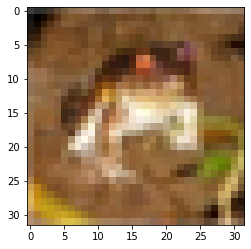

In [7]:
# SAPO - FROG
plt.imshow(x_treina[0])

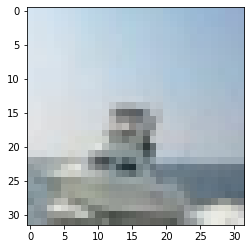

In [8]:
# BARCO - SHIP
plt.imshow(x_treina[100])

# Pré-Processamento

In [9]:
x_treina[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
x_treina[0].shape

(32, 32, 3)

In [11]:
x_treina.max()

255

In [ ]:
x_treina = x_treina/225

In [ ]:
x_teste = x_teste/255

In [12]:
x_treina.shape

(50000, 32, 32, 3)

In [13]:
x_teste.shape

(10000, 32, 32, 3)

## Labels

In [14]:
from keras.utils import to_categorical

In [15]:
y_treina.shape

(50000, 1)

In [16]:
y_treina[0]

array([6], dtype=uint8)

In [17]:
y_cat_treina = to_categorical(y_treina,10)

In [18]:
y_cat_treina.shape

(50000, 10)

In [19]:
y_cat_treina[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_teste = to_categorical(y_teste,10)

----------
# Criando o Modelo

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
modelo = Sequential()

## Primeiro conjunto de camadas

# CAMADA CONVOLUCIONAL
modelo.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CAMADA DE POOLING
modelo.add(MaxPool2D(pool_size=(2, 2)))

## Segundo conjunto de camadas

# CAMADA CONVOLUCIONAL
modelo.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CAMADA DE POOLING
modelo.add(MaxPool2D(pool_size=(2, 2)))

# FLATTENING - 28x28 para 764 ANTES DA ÚLTIMA CAMADA
modelo.add(Flatten())

# 256 NEURONS NA CAMADA OCULTA
modelo.add(Dense(256, activation='relu'))

# ÚLTIMA CAMADA É O CLASSIFICADOR, 10 CLASSES
modelo.add(Dense(10, activation='softmax'))


modelo.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

W0826 08:32:08.375045 140419412371200 deprecation_wrapper.py:119] From /home/displace/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 08:32:08.403786 140419412371200 deprecation_wrapper.py:119] From /home/displace/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 08:32:08.408069 140419412371200 deprecation_wrapper.py:119] From /home/displace/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 08:32:08.431957 140419412371200 deprecation_wrapper.py:119] From /home/displace/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0826 08:32

In [23]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [ ]:
#HORA DO CAFÉ!!
modelo.fit(x_treina,y_cat_treina,verbose=1,epochs=10)

W0826 08:32:11.066133 140419412371200 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0826 08:32:11.244840 140419412371200 deprecation_wrapper.py:119] From /home/displace/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
50000/50000 [==============================] - 45s 902us/step - loss: 1.5105 - acc: 0.4621
Epoch 2/10
50000/50000 [==============================] - 46s 912us/step - loss: 1.1598 - acc: 0.5960
Epoch 3/10
50000/50000 [==============================] - 45s 904us/step - loss: 1.0036 - acc: 0.6501
Epoch 4/10
50000/50000 [==============================] - 46s 911us/step - loss: 0.8943 - acc: 0.6910
Epoch 5/10
50000/50000 [==============================] - 46s 912us/step - loss: 0.8087 - acc: 0.7222
Epoch 6/10
50000/50000 [==============================] - 47s 936us/step - loss: 0.7404 - acc: 0.7463
Epoch 7/10
 7840/50000 [===>..........................] - ETA: 36s - loss: 0.6544 - acc: 0.7733

In [ ]:
# Descomente e rode para salvar o modelo treinado.
# model.save('cifar_10epochs.h5')

In [27]:
model.metrics_names

['loss', 'acc']

In [29]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 56us/step


[1.3332478387832642, 0.6444]

In [30]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [31]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.59      0.68      1000
          1       0.83      0.76      0.80      1000
          2       0.44      0.65      0.52      1000
          3       0.50      0.40      0.44      1000
          4       0.50      0.75      0.60      1000
          5       0.52      0.57      0.54      1000
          6       0.70      0.74      0.72      1000
          7       0.88      0.56      0.69      1000
          8       0.82      0.74      0.78      1000
          9       0.81      0.68      0.74      1000

avg / total       0.68      0.64      0.65     10000



## Para Casa: Modelo Grande

In [33]:
modelofull = Sequential()

## Primeiro conjunto de camadas

# CAMADA CONVOLUCIONAL
modelofull.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CAMADA CONVOLUCIONAL
modelofull.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# CAMADA DE POOLING
modelofull.add(MaxPool2D(pool_size=(2, 2)))

## Segundo conjunto de camadas

# CAMADA CONVOLUCIONAL
modelofull.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CAMADA CONVOLUCIONAL
modelofull.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# CAMADA DE POOLING
modelofull.add(MaxPool2D(pool_size=(2, 2)))

# FLATTENNING 28x28 para 764
modelofull.add(Flatten())

# 512 NEURONS NA CAMADA OCULTA (Experimente alterar)
modelofull.add(Dense(512, activation='relu'))

# ÚLTIMA CAMADA - CLASSIFICADOR - 10 CLASSES
modelofull.add(Dense(10, activation='softmax'))


modelofull.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
modelofull.fit(x_treina,y_cat_treina,verbose=1,epochs=20)

Epoch 1/20
50000/50000 [==============================] - 7s 148us/step - loss: 1.6025 - acc: 0.4197
Epoch 2/20
50000/50000 [==============================] - 8s 159us/step - loss: 1.1793 - acc: 0.5849
Epoch 3/20
50000/50000 [==============================] - 8s 155us/step - loss: 1.0083 - acc: 0.6508
Epoch 4/20
50000/50000 [==============================] - 8s 156us/step - loss: 0.9479 - acc: 0.6782
Epoch 5/20
50000/50000 [==============================] - 8s 154us/step - loss: 0.9145 - acc: 0.6952
Epoch 6/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.9005 - acc: 0.7015
Epoch 7/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.8867 - acc: 0.7061
Epoch 8/20
50000/50000 [==============================] - 8s 152us/step - loss: 0.8796 - acc: 0.7121
Epoch 9/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.8693 - acc: 0.7158
Epoch 10/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.8591 - a

In [35]:
modelofull.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 75us/step


[0.9843294318199157, 0.6902]

In [36]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_teste)

In [37]:
print(classification_report(y_teste,predictions))

             precision    recall  f1-score   support

          0       0.82      0.61      0.70      1000
          1       0.77      0.88      0.82      1000
          2       0.64      0.57      0.60      1000
          3       0.66      0.30      0.41      1000
          4       0.66      0.67      0.66      1000
          5       0.45      0.81      0.58      1000
          6       0.80      0.75      0.77      1000
          7       0.76      0.69      0.72      1000
          8       0.78      0.81      0.80      1000
          9       0.75      0.82      0.79      1000

avg / total       0.71      0.69      0.69     10000



In [38]:
modelofull.save('CIFAR10_FULL_model.h5')

___